# Dimensionality Reduction
*curse of dimensionality* : multiple feature make training extremely slow and harder to find a good solution.

dimensionality reduction is also extremely useful for data visualization(reducing dimention to 3D or 2D).

*  2 main approaches to dimention reduction : *projection* and *Manifold Learning*
* the most use techniques : PCA, Kernel PCA and LLE.

## Main Approaches for Dimensionality Reduction

### Projection
Notice that all training instances lie close to a plane: this is a lower-dimensional (2D) subspace of the high-dimensional (3D) space. If we project every training instance perpendicularly onto this subspace (as represented by the short lines connecting the instances to the plane), we will get the new 2D dataset.

projection is not always the best approach to dimensionality reduction. In many cases the subspace may twist and turn.

### Manifold Learning
an approach to non-linear dimensionality reduction, manifold is a 2D shape that can be bent and twisted in a higher-dimensional space.


## The most use techniques

### PCA
Principal Component Analysis (PCA) : First it identifies the hyperplane that lies closest to the data, and then it projects the data onto it,

Let's build a simple 3D dataset


In [87]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
m = 60
w1, w2 = .1, .3
noise = .1

angles = np.random.rand(m) * 3 * np.pi / 2 - .5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [88]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) # 2D
X2D = pca.fit_transform(X)

In [89]:
X2D[:5], X[:5]

(array([[-0.53253941, -0.37959988],
        [ 1.04660672, -0.26996712],
        [-0.28433998,  0.60002502],
        [-0.9948036 , -0.18401908],
        [-0.86307985,  0.30897392]]),
 array([[ 0.5930517 ,  0.67374227,  0.20971841],
        [-0.89167904,  0.23247003, -0.11912958],
        [ 0.60100668, -0.31509215, -0.00954706],
        [ 1.08591265,  0.58859071,  0.25550436],
        [ 1.07944736,  0.07853527,  0.18102645]]))

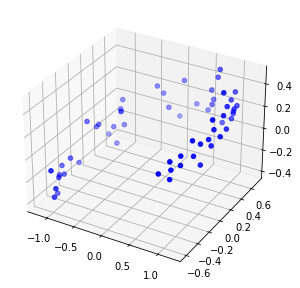

In [90]:
fig = plt.figure(figsize=(8,5))
ax = plt.axes(projection='3d')
xdata = X[:,0]
ydata = X[:,1]
zdata = X[:,2]
ax.scatter3D(xdata, ydata, zdata, c='b', cmap='Greens');

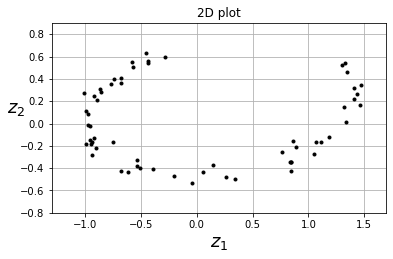

In [91]:
fig = plt.figure()
ax = fig.add_subplot(111, aspect='equal')
ax.plot(X2D[:,0], X2D[:,1], 'k.')
ax.set_xlabel("$z_1$", fontsize=18)
ax.set_ylabel("$z_2$", fontsize=18, rotation=0)
ax.set_title('2D plot')
ax.axis([-1.3, 1.7, -.8, .9])
ax.grid(True);

**Explained Variance Ratio**: the percentage of variance that is attributed by each of the selected components.

In [106]:
print(pca.explained_variance_ratio_)
print('little information :',1 - (pca.explained_variance_ratio_[0] + pca.explained_variance_ratio_[1] ))

[0.86055355 0.12944817]
little information : 0.00999827250519536


> 86% along at 1stPC, 13% at 2ndPC and .9 % little information

**Choosing the Right Number of Dimensions**

In [107]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.targett = mnist.target.astype(np.uint8)

In [108]:
from sklearn.model_selection import train_test_split

X = mnist.data
y = mnist.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

In [113]:
pca = PCA()
pca.fit(X_train)
pca.explained_variance_ratio_.shape

(784,)

np.cumsum : function is used when we want to compute the cumulative sum of array elements over a given axis. **fibonacci**

In [122]:
in_arr = np.array([[2, 4, 6], [1, 3, 5]])
print (in_arr) 
out_sum = np.cumsum(in_arr) 
print ("cumulative sum of array elements: ", out_sum) 

[[2 4 6]
 [1 3 5]]
cumulative sum of array elements:  [ 2  6 12 13 16 21]


In [118]:
cumsum = np.cumsum(pca.explained_variance_ratio_)
cumsum.shape

(784,)

the minimum number of dimensions required to preserve 95%
of the training set’s variance:

In [128]:
d = np.argmax(cumsum >= .95) + 1 # 1st True
d

154

In [143]:
a = np.array([False,False,True,False,True])
np.argmax(a)

2

or use n_components between 0 and 1

In [124]:
pca = PCA(n_components=0.95)
X_reduced = pca.fit_transform(X_train)
pca.n_components_

154

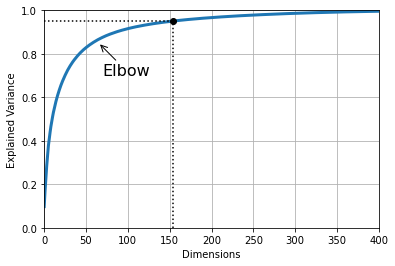

In [126]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)
plt.show()

**PCA for Compression**

In [145]:
pca = PCA(n_components=.95)
X_reduced = pca.fit_transform(X_train)
X_reduced.shape 

(56000, 154)

> feature only have 154 instead of 784

you can decompress but This won’t give you back the original data, it will likely be close to the original data.

*reconstruction error*: MSE between original data and decompress data.

In [146]:
X_recovered = pca.inverse_transform(X_reduced)
X_recovered.shape

(56000, 784)

In [184]:
X_recovered[0][::100], X[0][::100] # reduce not importance feature

(array([ 2.41559496e-14, -3.67387615e+00, -2.78972702e+00,  3.51091694e+00,
        -1.42135702e+01, -5.28589827e+00,  2.05482754e+02,  0.00000000e+00]),
 array([  0.,   0.,   0.,   0.,   0.,   0., 253.,   0.]))

see different between original and compress images

In [154]:
def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # This is equivalent to n_rows = ceil(len(instances) / images_per_row):
    n_rows = (len(instances) - 1) // images_per_row + 1

    # Append empty images to fill the end of the grid, if needed:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # Reshape the array so it's organized as a grid containing 28×28 images:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # Now that we have a big image, we just need to show it:
    plt.imshow(big_image, cmap = plt.cm.binary, **options)
    plt.axis("off")

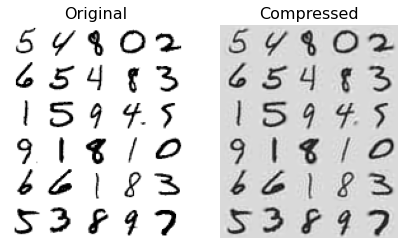

In [173]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[:30])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[:30])
plt.title("Compressed", fontsize=16);

**Randomized PCA**
uses a stochastic algorithm called Randomized PCA that quickly
finds an approximation

it is dramatically faster than full SVD.

but n_components must be a *number of component*(i.e not .95 but 154) when using randomized

In [186]:
Rnd_pca =PCA(n_components=154, svd_solver='randomized', random_state=42)
X_reduced = Rnd_pca.fit_transform(X_train)
X_reduced.shape

(56000, 154)

> if you want to use full SVD set svd_solver to "full"

**Incremental PCA**
They allow you to split the training set into mini-batches and feed an IPCA algorithm one mini-batch at a time

is useful for large training sets and for applying PCA online (i.e., on the fly, as new instances arrive).

In [195]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
IPCA = IncrementalPCA(n_components=154)
for X_batch in np.array_split(X_train, n_batches) :
    IPCA.partial_fit(X_batch) # partial_fit

X_reduced = IPCA.transform(X_train)
X_reduced.shape


(56000, 154)

### Kernel PCA
making it possible to perform complex nonlinear projections for dimensionality reduction.

In [200]:
from sklearn.decomposition import KernelPCA

X, t = make_swiss_roll(n_samples=1000, noise=.2 , random_state=42)
Rbf_Pca = KernelPCA(n_components=2, kernel='rbf', gamma=.04)
X_reduced = Rbf_Pca.fit_transform(X)

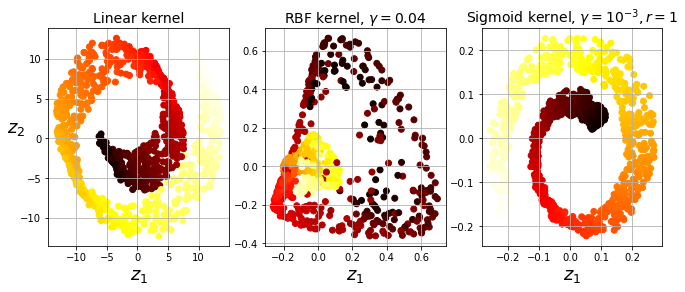

In [208]:
from sklearn.decomposition import KernelPCA

lin_pca = KernelPCA(n_components = 2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components = 2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

y = t > 6.9

plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()

**Selecting a Kernel and Tuning Hyperparameters**

As kPCA is an unsupervised learning algorithm, there is no obvious performance measure to help you select the best kernel and hyperparameter values.

In [213]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

Clf = Pipeline([ 
    ('kpca', KernelPCA(n_components=2)),
    ('LGR_model', LogisticRegression())
])

params = [{
    'kpca__gamma': np.linspace(.03,.05,10),
    'kpca__kernel':['rbf','sigmoid']
}]

grid_search = GridSearchCV(Clf, params, cv=3)
grid_search.fit(X, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('LGR_model', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [220]:
grid_search.best_params_

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}

In [222]:
Rbf_pca = KernelPCA(n_components = 2, kernel="rbf", gamma=0.0433,
                    fit_inverse_transform=True) # can inverse
X_reduced = Rbf_pca.fit_transform(X)
X_preimage = Rbf_pca.inverse_transform(X_reduced) 

In [234]:
from sklearn.metrics import mean_squared_error

mean_squared_error(X, X_preimage)

32.78630879576615

### LLE
Locally Linear Embedding (LLE) is another powerful nonlinear dimensionality reduction (NLDR) technique. It is a Manifold Learning technique. which preserves distances within local neighborhoods.

In [238]:
from sklearn.manifold import LocallyLinearEmbedding

X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)
lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=32)
X_reduced = lle.fit_transform(X)

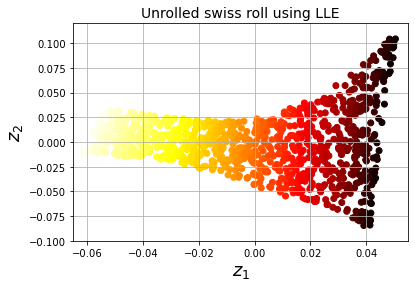

In [239]:
plt.title("Unrolled swiss roll using LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)
plt.show()

### Other Dimensionality Reduction Techniques

* *Random Projections*: using a random linear projection, very likely to preserve distances well.
* *Multidimensional Scaling (MDS)*: trying to preserve the distances between the instances.
* *Isomap*: connecting each instance to its nearest neighbors, trying to preserve the *geodesic* distances between the instances.
* *t-Distributed Stochastic Neighbor Embedding (t-SNE)*: trying to keep similar instances close
and dissimilar instances apart. It is mostly used for visualization, in
particular to visualize clusters of instances in high-dimensional
space (e.g., to visualize the MNIST images in 2D)
* *Linear Discriminant Analysis (LDA)*: will keep classes as
far apart as possible, so LDA is a good technique to reduce dimensionality before running another classification algorithm such as an SVM classifier.



> The geodesic distance between two nodes in a graph is the number of nodes on the shortest path between these nodes, see [image](https://www.researchgate.net/figure/Geodesic-and-Euclidean-distances-between-A-and-B_fig5_323178329)

c:\Users\alant\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\alant\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


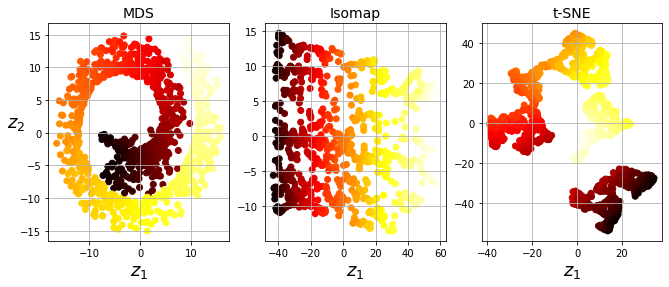

In [245]:
from sklearn.random_projection import johnson_lindenstrauss_min_dim
from sklearn.manifold import MDS, Isomap, TSNE
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

X_reduced_mds = MDS(n_components=2, random_state=42).fit_transform(X)
X_reduced_isomap = Isomap(n_components=2).fit_transform(X)
X_reduced_tsne = TSNE(n_components=2, random_state=42).fit_transform(X)

titles = ["MDS", "Isomap", "t-SNE"]
plt.figure(figsize=(11,4))

for subplot, title, X_reduced in zip((131, 132, 133), titles,
                                     (X_reduced_mds, X_reduced_isomap, X_reduced_tsne)):
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()